In [83]:
import requests
from bs4 import BeautifulSoup
import re 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698088158196"

In [3]:
page = requests.get(url)
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.text, "html.parser")

In [5]:
a = soup.findAll('div', class_ = "seller-info")

In [6]:
Builder = []
for i in a:
    Builder.append(i.text)

In [7]:
city = soup.findAll('span', class_ = 'cityName')

In [8]:
City = []
for i in city:
    City.append(i.text)

In [9]:
area = soup.findAll('span', itemprop = 'addressLocality')

In [10]:
Area = []
for i in area:
    Area.append(i.text)

In [11]:
prop = soup.findAll('div', class_ = 'title-line-wrap')

In [12]:
Property = []
for i in prop:
    Property.append(i.text)

In [13]:
price = soup.findAll('td', class_= 'price')

In [14]:
Price = []
for i in price:
    a = i.text.replace(' ', '')
    Price.append(a)

In [15]:
area_sqft = soup.findAll('td', class_ = 'size')

In [16]:
Area_sqft = []
for i in area_sqft:
    a = i.text.replace(' ','')
    Area_sqft.append(a)

In [17]:
status = soup.findAll('td', class_ = 'val')

In [18]:
Status = []
for i in status:
    a = i.text
    Status.append(a) if Status.append(a) else "NA"

In [19]:
house_data = soup.findAll('li', attrs={'class':'cardholder'})

In [20]:
Completed = []
for item in house_data:
    posess = item.li.span.text
    Completed.append(posess)

In [21]:
print('Builder:',len(Builder))
print('City:',len(City))
print('Area:', len(Area))
print('Property:', len(Property))
print('Price:', len(Price))
print('Area_sqft:', len(Area_sqft))
print('Status:', len(Status))
print('Completed:',len(Completed))

Builder: 20
City: 20
Area: 20
Property: 20
Price: 20
Area_sqft: 20
Status: 20
Completed: 20


In [22]:
Cleaned_Property =  [i.split('in')[0] for i in Property]

In [23]:
Cleaned_Price = [i.strip('Cr') for i in Price]

In [24]:
Cleaned_Builder = [i.strip('BUILDER0') for i in Builder]

In [25]:
def convert_price(price):
    if 'L' in price:
        price = float(price.replace('L', ''))
        price /= 100
        return price
    else:
        return float(price)

processed_prices = [convert_price(price) for price in Cleaned_Price]

## Creating a Dataframe from page1

In [26]:
df1 = pd.DataFrame({
    'Builder Name':Builder,
    'City':City,
    'Locality':Area,
    'Property Type':Cleaned_Property,
    'Price in Crores':processed_prices,
    'Area in Sqft':Area_sqft,
    'Construction Status':Status,
    'Age of property':Completed
})

In [27]:
df1

,Builder Name,City,Locality,Property Type,Price in Crores,Area in Sqft,Construction Status,Age of property
0,Theme Ambience InfrastructuresBUILDER0,Hyderabad,Attapur,3 BHK Apartment,1.5000,2090,Under Construction,Possession by Dec 2024
1,Elemental RealtyBUILDER0,Hyderabad,Patancheru,4 BHK Villa,1.4800,1930,Under Construction,Possession by Nov 2024
2,R V Nirmaan Private LimitedBUILDER0,Hyderabad,Miyapur,3 BHK Apartment,1.2700,1967,Under Construction,Possession by Nov 2024
3,Risinia BuildersBUILDER0,Hyderabad,Pragathi Nagar Kukatpally,2 BHK Apartment,0.7345,1312,Under Construction,Possession by May 2025
4,Cyber City OrianaBUILDER0,Hyderabad,Kukatpally,3 BHK Apartment,1.2800,1480,Under Construction,Possession by Nov 2025
5,Shree Vasavi DevelopersBUILDER0,Hyderabad,Attapur,3 BHK Apartment,1.4600,2005,Under Construction,Possession by Nov 2024
6,Jain ConstructionsBUILDER0,Hyderabad,Malkajgiri,3 BHK Apartment,1.6300,2245,Under Construction,Possession by Nov 2023
7,Ira RealityBUILDER0,Hyderabad,Adibatla,4 BHK Villa,3.1400,3705,Under Construction,Possession by Dec 2025
8,Hallmark BuildersBUILDER0,Hyderabad,Patighanpur,3 BHK Apartment,1.1300,1885,Under Construction,Possession by Nov 2025
9,APR GroupBUILDER0,Hyderabad,Bachupally,4 BHK Villa,4.0800,3400,Under Construction,Possession by Nov 2024


## Creating DataFrame from remaining pages

In [28]:
Builder1 = []
City1 = []
Area1 = []
Property1 = []
Price1 = []
Area_sqft1 = []
Status1 = []
Completed1 = []

In [29]:
for i in range(3,300):
    urls = "https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page="+str(i)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text, "html.parser")
    

    a1 = soup.findAll('div', class_="seller-info")
    for i in a1:
        try:
            Builder1.append(i.text)
        except AttributeError:
            Builder1.append(None)

    city1 = soup.findAll('span', class_='cityName')
    for i in city1:
        try:
            City1.append(i.text)
        except AttributeError:
            City1.append(None)

    area1 = soup.findAll('span', itemprop='addressLocality')
    for i in area1:
        try:
            Area1.append(i.text)
        except AttributeError:
            Area1.append(None)

    prop1 = soup.findAll('div', class_='title-line-wrap')
    for i in prop1:
        try:
            Property1.append(i.text)
        except AttributeError:
            Property1.append(None)

    price1 = soup.findAll('td', class_='price')
    for i in price1:
        try:
            a1 = i.text.replace(' ', '')
            Price1.append(a1)
        except AttributeError:
            Price1.append(None)

    area_sqft1 = soup.findAll('td', class_='size')
    for i in area_sqft1:
        try:
            a1 = i.text.replace(' ', '')
            Area_sqft1.append(a1)
        except AttributeError:
            Area_sqft1.append(None)

    status1 = soup.findAll('td', class_='val')
    for i in status1:
        try:
            a1 = i.text
            Status1.append(a1) if Status1.append(a1) else "NA"
        except AttributeError:
            Status1.append(None)

    house_data1 = soup.findAll('li', attrs={'class': 'cardholder'})
    for item in house_data1:
        try:
            posess1 = item.li.span.text
            Completed1.append(posess1)
        except AttributeError:
            Completed1.append(None)



https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page=3
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page=4
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page=5
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page=6
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page=7
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page=8
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page=9
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page=10
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1698158965182&page=11
https://www.makaan.com/hyd

In [30]:
print('Builder1:',len(Builder1))
print('City1:',len(City1))
print('Area1:', len(Area1))
print('Property1:', len(Property1))
print('Price1:', len(Price1))
print('Area_sqft1:', len(Area_sqft1))
print('Status1:', len(Status1))
print('Completed1:',len(Completed1))

Builder1: 5940
City1: 5940
Area1: 5940
Property1: 5940
Price1: 5940
Area_sqft1: 5940
Status1: 5940
Completed1: 5940


In [31]:
Cleaned_Property1 =  [i.split('in')[0] for i in Property1]

In [32]:
Cleaned_Price1 = [i.strip('Cr') for i in Price1]

In [33]:
Cleaned_Builder1 = [i.strip('BUILDER0') for i in Builder1]

In [34]:
def convert_price1(price1):
    if 'L' in price1:
        price1 = float(price1.replace('L', ''))
        price1 /= 100
        return price1
    else:
        return float(price1)

processed_prices1 = [convert_price1(price1) for price1 in Cleaned_Price1]

## Creating DataFrame

In [35]:
df2 = pd.DataFrame({
    'Builder Name':Builder1,
    'City':City1,
    'Locality':Area1,
    'Property Type':Cleaned_Property1,
    'Price in Crores':processed_prices1,
    'Area in Sqft':Area_sqft1,
    'Construction Status':Status1,
    'Age of property':Completed1
})

In [36]:
df2

,Builder Name,City,Locality,Property Type,Price in Crores,Area in Sqft,Construction Status,Age of property
0,Om Sree Builders DevelopersBUILDER0,Hyderabad,Gundlapochampally,2 BHK Apartment,0.8098,1285,Under Construction,Possession by May 2027
1,SVC ConstructionsBUILDER0,Hyderabad,Jeedimetla,2 BHK Apartment,0.8154,1510,Under Construction,Possession by Nov 2024
2,Om Sree Builders And DevelopersBUILDER0,Hyderabad,Sainikpuri,3 BHK Apartment,1.3800,2200,Ready to move,0 - 1 year old
3,Provident Housing LimitedBUILDER0,Hyderabad,Rajendra Nagar,1 BHK Apartment,0.4800,610,Ready to move,2 - 3 years old
4,GSR GroupBUILDER0,Hyderabad,Kollur,4 BHK Independent House,4.0900,6300,Under Construction,Possession by Jun 2025
...,...,...,...,...,...,...,...,...
5935,TSR PROPERTIESAGENT0,Hyderabad,Nanakramguda,2 BHK Apartment,0.9073,1315,Under Construction,Possession by Nov 2026
5936,TSR PROPERTIESAGENT0,Hyderabad,Nanakramguda,3 BHK Apartment,1.5300,2230,Under Construction,Possession by Nov 2026
5937,TSR PROPERTIESAGENT0,Hyderabad,Nanakramguda,2 BHK Apartment,0.9073,1315,Under Construction,Possession by Nov 2026
5938,TSR PROPERTIESAGENT0,Hyderabad,Narsingi,2 BHK ApartmentNars,0.6893,1130,Under Construction,2 Bathrooms


## Merging two dataframes one single dataframe

In [37]:
df = pd.concat([df1,df2], ignore_index=True)

In [38]:
df

,Builder Name,City,Locality,Property Type,Price in Crores,Area in Sqft,Construction Status,Age of property
0,Theme Ambience InfrastructuresBUILDER0,Hyderabad,Attapur,3 BHK Apartment,1.5000,2090,Under Construction,Possession by Dec 2024
1,Elemental RealtyBUILDER0,Hyderabad,Patancheru,4 BHK Villa,1.4800,1930,Under Construction,Possession by Nov 2024
2,R V Nirmaan Private LimitedBUILDER0,Hyderabad,Miyapur,3 BHK Apartment,1.2700,1967,Under Construction,Possession by Nov 2024
3,Risinia BuildersBUILDER0,Hyderabad,Pragathi Nagar Kukatpally,2 BHK Apartment,0.7345,1312,Under Construction,Possession by May 2025
4,Cyber City OrianaBUILDER0,Hyderabad,Kukatpally,3 BHK Apartment,1.2800,1480,Under Construction,Possession by Nov 2025
...,...,...,...,...,...,...,...,...
5955,TSR PROPERTIESAGENT0,Hyderabad,Nanakramguda,2 BHK Apartment,0.9073,1315,Under Construction,Possession by Nov 2026
5956,TSR PROPERTIESAGENT0,Hyderabad,Nanakramguda,3 BHK Apartment,1.5300,2230,Under Construction,Possession by Nov 2026
5957,TSR PROPERTIESAGENT0,Hyderabad,Nanakramguda,2 BHK Apartment,0.9073,1315,Under Construction,Possession by Nov 2026
5958,TSR PROPERTIESAGENT0,Hyderabad,Narsingi,2 BHK ApartmentNars,0.6893,1130,Under Construction,2 Bathrooms


In [39]:
#df.to_csv("Makaan.csv")

## Exploratory Data Analysis

In [40]:
df.shape

(5960, 8)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Builder Name         5960 non-null   object 
 1   City                 5960 non-null   object 
 2   Locality             5960 non-null   object 
 3   Property Type        5960 non-null   object 
 4   Price in Crores      5960 non-null   float64
 5   Area in Sqft         5960 non-null   object 
 6   Construction Status  5960 non-null   object 
 7   Age of property      5786 non-null   object 
dtypes: float64(1), object(7)
memory usage: 372.6+ KB


In [44]:
df.isnull().sum()

Builder Name             0
City                     0
Locality                 0
Property Type            0
Price in Crores          0
Area in Sqft             0
Construction Status      0
Age of property        174
dtype: int64

In [42]:
df.describe()

,Price in Crores
count,5960.000000
mean,1.392480
std,2.272065
min,0.024000
25%,0.442850
50%,0.873700
75%,1.530000
max,64.500000


### Type conversion using type-casting method

In [46]:
print(df['Area in Sqft'].dtype)
df['Area in Sqft'] = df['Area in Sqft'].astype("int")
print(df['Area in Sqft'].dtype)

object
int32


### Null Value Treatment

In [54]:
df.dropna(inplace=True)

In [55]:
print(df.isnull().sum())

Builder Name           0
City                   0
Locality               0
Property Type          0
Price in Crores        0
Area in Sqft           0
Construction Status    0
Age of property        0
dtype: int64


In [56]:
df.columns

Index(['Builder Name', 'City', 'Locality', 'Property Type', 'Price in Crores',
       'Area in Sqft', 'Construction Status', 'Age of property'],
      dtype='object')

### Adding a new column price per sq_ft.

In [59]:
df = df.copy()
df["Price per sqft in thousands"] = df["Price in Crores"]*100000/df["Area in Sqft"]
df.head()

,Builder Name,City,Locality,Property Type,Price in Crores,Area in Sqft,Construction Status,Age of property,Price per sqft,Price per sqft in thousands
0,Theme Ambience InfrastructuresBUILDER0,Hyderabad,Attapur,3 BHK Apartment,1.5000,2090,Under Construction,Possession by Dec 2024,71.770335,71.770335
1,Elemental RealtyBUILDER0,Hyderabad,Patancheru,4 BHK Villa,1.4800,1930,Under Construction,Possession by Nov 2024,76.683938,76.683938
2,R V Nirmaan Private LimitedBUILDER0,Hyderabad,Miyapur,3 BHK Apartment,1.2700,1967,Under Construction,Possession by Nov 2024,64.565328,64.565328
3,Risinia BuildersBUILDER0,Hyderabad,Pragathi Nagar Kukatpally,2 BHK Apartment,0.7345,1312,Under Construction,Possession by May 2025,55.983232,55.983232
4,Cyber City OrianaBUILDER0,Hyderabad,Kukatpally,3 BHK Apartment,1.2800,1480,Under Construction,Possession by Nov 2025,86.486486,86.486486


In [62]:
df.drop('Price per sqft', axis=1, inplace=True)

### Replacing values as Old 

In [74]:
def merge(df):
    df['Age of property'] = df['Age of property'].replace({
        '1 Bathrooms':'Old',
        '2 Bathrooms':'Old',
        '3 Bathrooms':'Old',
        '4 Bathrooms':'Old',
        '5 Bathrooms':'Old',
        '6 Bathrooms':'Old',
        '7 Bathrooms':'Old',
        '8 Bathrooms':'Old',
        '9 Bathrooms':'Old',
        'Resale':'Old',
        '1 open sides':'Old',
        '2 open sides':'Old',
        '3 open sides':'old',
        '4 open sides':'Old',
        '5 open sides':'Old',
        'East facing':'Old',
        'SouthEast facing':'Old',
        'NorthEast facing':'Old',
        'West facing':'Old',
        
    })
    return df
df = merge(df)

## In which locality most numer of properties are available

In [86]:
locality_counts = df['Locality'].value_counts().reset_index()
locality_counts

,index,Locality
0,Miyapur,205
1,Kollur,202
2,Yacharam,164
3,Narsingi,149
4,Kokapet,137
...,...,...
291,Sathamrai Village,1
292,Khairatabad Road,1
293,Thumkunta,1
294,B N reddy nagar,1


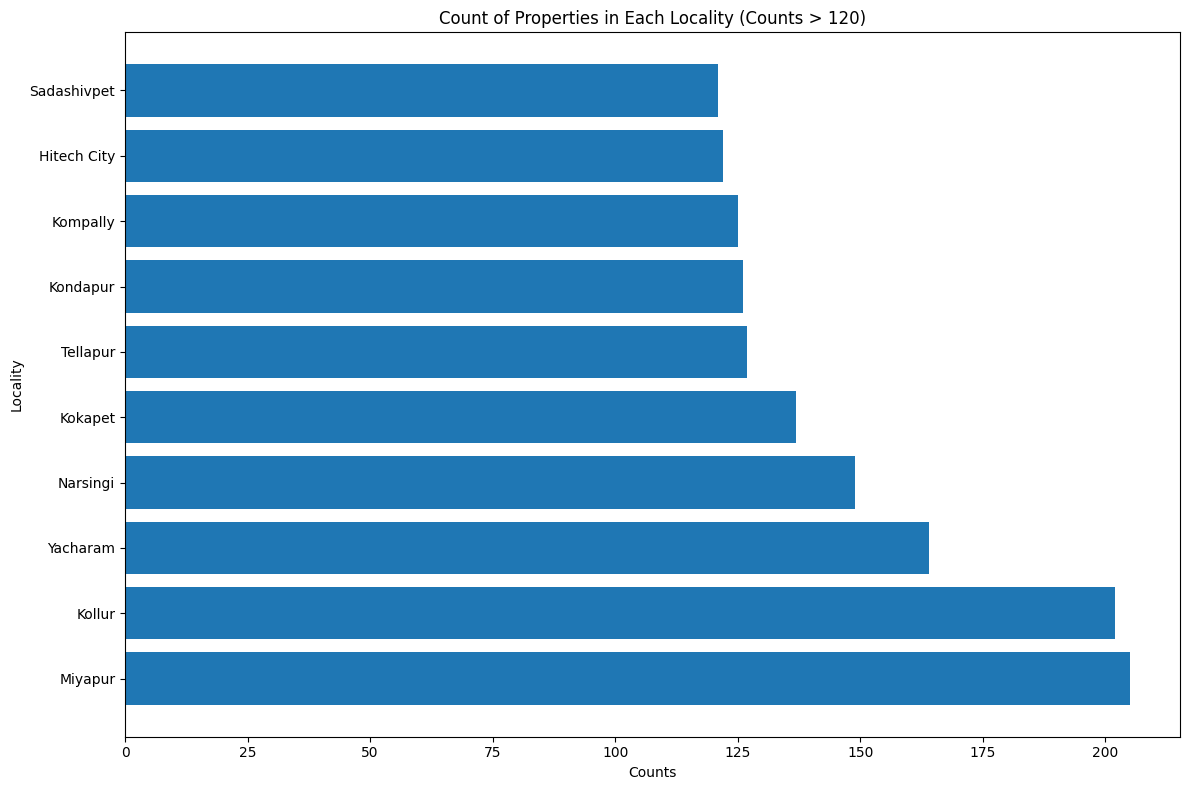

In [91]:
threshold = 120
filtered_locality_counts = locality_counts[locality_counts['Locality'] > threshold]


plt.figure(figsize=(12, 8))
plt.barh(filtered_locality_counts['index'], filtered_locality_counts['Locality'])
plt.xlabel('Counts')
plt.ylabel('Locality')
plt.title('Count of Properties in Each Locality (Counts > 120)')
plt.tight_layout()
plt.show()

In [110]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Which builder/agent has the most properties..??

In [111]:
df['Builder Name'].value_counts().reset_index()

,index,Builder Name
0,sellerVERIFIED OWNER,535
1,Ashish MishraAGENT0,453
2,Sameer Kr MehraAGENT0,250
3,Krishna KumarAGENT0,168
4,Dial To PropertyAGENT0,162
5,FuturelandAGENT0,150
6,TSR PROPERTIESAGENT0,142
7,Vasavi GroupBUILDER0,130
8,KumarAGENT0,128
9,RamanaAGENT0,86


## What is the status of the houses.?

In [118]:
status = df['Construction Status'].value_counts().reset_index()
status

,index,Construction Status
0,Under Construction,2624
1,New,1518
2,Ready to move,1479
3,Resale,165


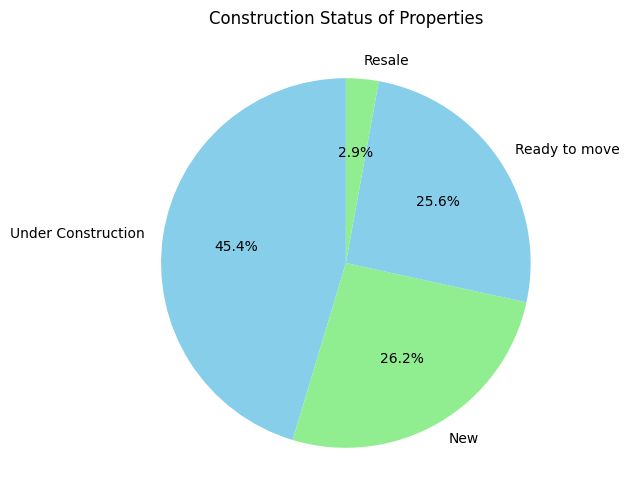

In [119]:
plt.figure(figsize=(6, 6))
plt.pie(status['Construction Status'], labels=status['index'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Construction Status of Properties')
plt.show()

`observation` - As around 2624 properties are under construction, it is better to buy property now as after construction, prices will raise.

## How does the price vary across different localities?

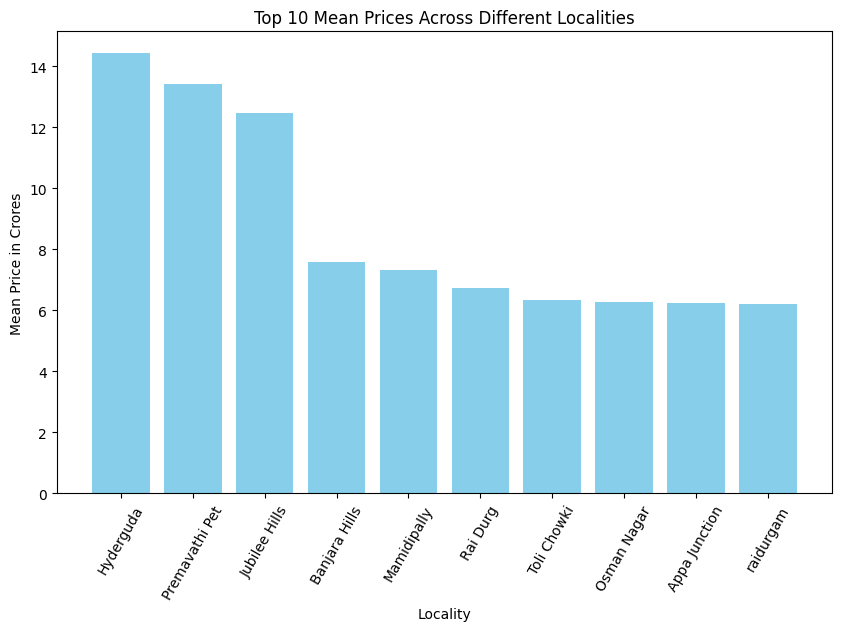

In [158]:
mean_prices = df.groupby('Locality')['Price in Crores'].mean().reset_index()
top_10_mean_prices = mean_prices.nlargest(10, 'Price in Crores')

plt.figure(figsize=(10, 6))
plt.bar(top_10_mean_prices['Locality'], top_10_mean_prices['Price in Crores'], color='skyblue')
plt.xlabel('Locality')
plt.ylabel('Mean Price in Crores')
plt.title('Top 10 Mean Prices Across Different Localities')
plt.xticks(rotation=60)
plt.show()

## Are there any correlations between the price and area in square foot?

In [160]:
correlation = df['Price in Crores'].corr(df['Area in Sqft'])
correlation

0.5462102934468925

- The correlation value between Price and Area in Sqft is approximately 0.5462, indicating a moderate positive correlation. 
- This suggests that there is a tendency for the price to increase with an increase in the area in square feet, but it's not a perfect linear relationship.

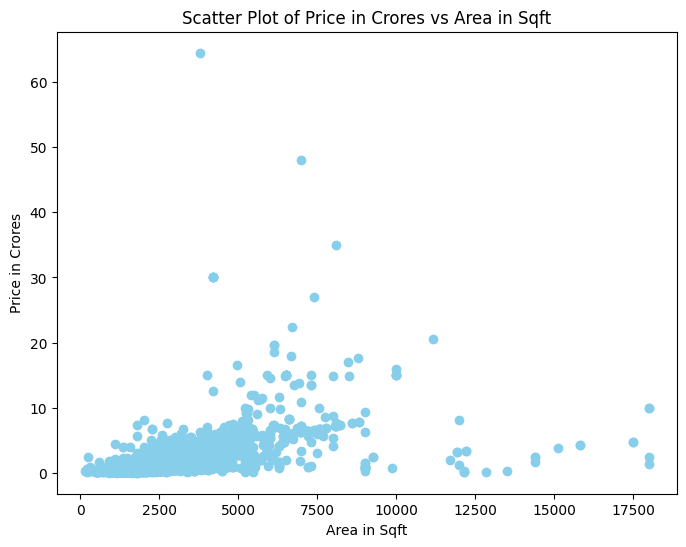

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Area in Sqft'], df['Price in Crores'], color='skyblue')
plt.title('Scatter Plot of Price in Crores vs Area in Sqft')
plt.xlabel('Area in Sqft')
plt.ylabel('Price in Crores')
plt.show()

`observation` - there is a slight chance of increase in price, when area in sqft increases 

In [163]:
df.groupby('Age of property')['Price in Crores'].mean().reset_index()

,Age of property,Price in Crores
0,0 - 1 year old,1.166938
1,1 - 2 years old,0.827335
2,1 year old,0.355900
3,10 - 11 years old,2.236667
4,11 - 12 years old,1.410000
5,11 years old,4.000000
6,12 - 13 years old,2.250000
7,123 - 124 years old,0.531450
8,13 - 14 years old,0.900000
9,14 - 15 years old,1.350000


## Is there any noticeable difference between Price and Construction status of properties.?

In [170]:
df.groupby('Construction Status')['Price in Crores'].describe()

,count,mean,std,min,25%,50%,75%,max
Construction Status,,,,,,,,
New,1518.0,0.467661,0.713895,0.0393,0.228025,0.31305,0.472375,16.50
Ready to move,1479.0,1.899171,2.753386,0.1200,0.665250,1.10000,2.020000,48.00
Resale,165.0,1.586574,3.000548,0.0240,0.242500,0.44000,1.750000,22.35
Under Construction,2624.0,1.676908,2.265208,0.1000,0.810475,1.16000,1.710000,64.50


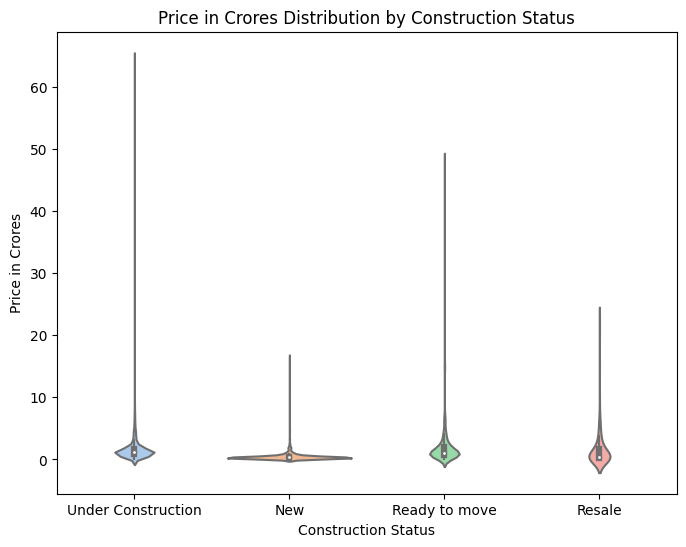

In [172]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Construction Status', y='Price in Crores', data=df, palette='pastel')
plt.title('Price in Crores Distribution by Construction Status')
plt.xlabel('Construction Status')
plt.ylabel('Price in Crores')
plt.show()

## Which Localities have the highest and lowest average property prices?

In [180]:
highest = df[['Locality','Price in Crores']].max()
lowest = df[['Locality','Price in Crores']].min()
print(highest)
print(lowest)

Locality           raidurgam
Price in Crores         64.5
dtype: object
Locality           AS Rao Nagar
Price in Crores           0.024
dtype: object


<Axes: xlabel='Price in Crores', ylabel='Count'>

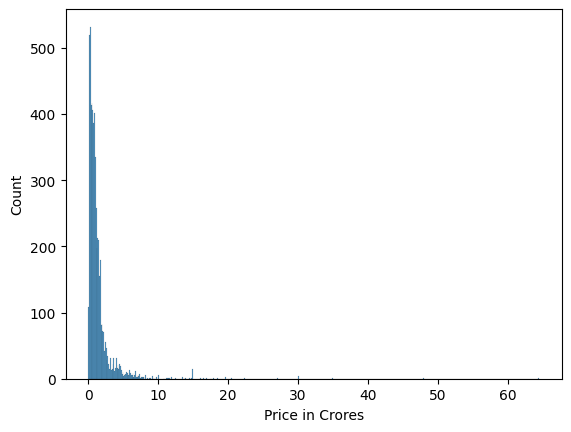

In [188]:
sns.histplot(data=df['Price in Crores'])

<Axes: xlabel='Price per sqft in thousands', ylabel='Count'>

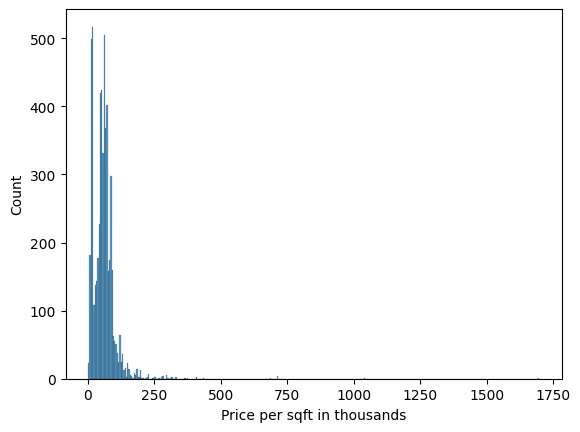

In [190]:
sns.histplot(data=df['Price per sqft in thousands'])